In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage  import io 
from tqdm import tqdm
from sklearn import svm
%matplotlib inline

# GETTING DATASET

In [12]:
dftrain = pd.read_csv("archive/sign_mnist_train.csv")
dftest = pd.read_csv("archive/sign_mnist_test.csv")
dftrain.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [13]:
dftest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [106]:
dftrain.shape
X_train = dftrain.drop('label',axis=1).values
Y_train = dftrain['label'].values
X_test = dftest.drop('label',axis=1).values
Y_test = dftest['label'].values

In [107]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
def printImage(sub,val):
    img = val.reshape((28,28))
    sub.imshow(img,cmap=plt.cm.gray)


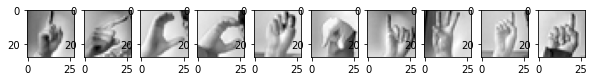

In [142]:
fig, ax = plt.subplots(1,10,figsize=(10,3))
for i in range(10):
    printImage(ax[i],X_train[i])

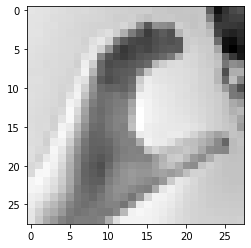

In [143]:
printImage(plt,X_train[2])

# LogReg

In [21]:
iterations = [0,100,200,300]
models = []
C = [0.01,0.1, 1, 10, 100, 1000,10000]

logreg = linear_model.LogisticRegression(max_iter=i)
logreg.fit(X_train,Y_train)
models.append(logreg)

C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
for c in C:
    logreg = linear_model.LogisticRegression(penalty = "l2",C = c,solver = "sag")
    logreg.fit(X_train,Y_train)
    models.append(logreg)


C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

In [ ]:
for c in C:
    logreg = linear_model.LogisticRegression(penalty = "l1",C = c,solver = "saga",max_iter=i)
    logreg.fit(X_train,Y_train)
    models.append(logreg)

In [ ]:
for mod in models:
    yhat = mod.predict(X_train)
    acc = np.mean(yhat == Y_train)
    print('Train Accuaracy = {0:f}%'.format(acc*100))
    yhat = mod.predict(X_test)
    acc = np.mean(yhat == Y_test)
    print('Test Accuaracy = {0:f}%'.format(acc*100))

# SVM

In [43]:
from sklearn import svm
svm_models = []

C = [0.01,0.1, 1, 10, 100, 1000,10000]
for c in C:
    svc = svm.SVC(C=c,probability=False,  kernel="linear",verbose=10)
    svc.fit(X_train,Y_train)
    svm_models.append(svc)



[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [44]:
for c in C:
    svc = svm.SVC(C=c,probability=False,  kernel="poly",verbose=10)
    svc.fit(X_train,Y_train)
    svm_models.append(svc)

[LibSVM][LibSVM]

KeyboardInterrupt: 

In [ ]:
for c in C:
    svc = svm.SVC(C=c,probability=False,  kernel="rbf",verbose=10)
    svc.fit(X_train,Y_train)
    svm_models.append(svc)

In [39]:
arr1 = []
for svc in svm_models:
    yhat_tr = svc.predict(X_train)
    acc_tr = np.mean(yhat_tr == Y_train)
    yhat_ts = svc.predict(X_test)
    acc_ts = np.mean(yhat_ts == Y_test)
    arr1.append(acc_tr*100)
    arr1.append(acc_ts*100)
    print('Train Accuaracy = {0:f}%'.format(acc_tr*100))
    print('Test Accuaracy = {0:f}%'.format(acc_ts*100))

Train Accuaracy = 100.000000%
Test Accuaracy = 80.688790%
Train Accuaracy = 100.000000%
Test Accuaracy = 80.577245%
Train Accuaracy = 100.000000%
Test Accuaracy = 80.535416%
Train Accuaracy = 100.000000%
Test Accuaracy = 80.535416%
Train Accuaracy = 100.000000%
Test Accuaracy = 80.535416%
Train Accuaracy = 100.000000%
Test Accuaracy = 80.535416%
Train Accuaracy = 100.000000%
Test Accuaracy = 80.535416%
Train Accuaracy = 29.699508%
Test Accuaracy = 20.175683%
Train Accuaracy = 74.070297%
Test Accuaracy = 53.722811%
Train Accuaracy = 98.823529%
Test Accuaracy = 78.137200%
Train Accuaracy = 100.000000%
Test Accuaracy = 82.194646%
Train Accuaracy = 100.000000%
Test Accuaracy = 81.511433%
Train Accuaracy = 100.000000%
Test Accuaracy = 81.497490%
Train Accuaracy = 100.000000%
Test Accuaracy = 81.497490%
Train Accuaracy = 43.136041%
Test Accuaracy = 30.312326%
Train Accuaracy = 94.405391%
Test Accuaracy = 77.426102%
Train Accuaracy = 100.000000%
Test Accuaracy = 84.885666%
Train Accuaracy = 1

In [ ]:
arr2 = []
for svc in svm_models:
    yhat_tr = svc.predict(X_train)
    acc_tr = np.mean(yhat_tr == Y_train)
    yhat_ts = svc.predict(X_test)
    acc_ts = np.mean(yhat_ts == Y_test)
    arr2.append(acc_tr*100)
    arr2.append(acc_ts*100)
    print('Train Accuaracy = {0:f}%'.format(acc_tr*100))
    print('Test Accuaracy = {0:f}%'.format(acc_ts*100))

In [41]:
savedsvm1 = svm_models

In [9]:
def Train_All(X_train,Y_train,X_test,Y_test):
    models = []
    iterations = [0,100,200,300]
    C = [0.01,0.1, 1, 10, 100, 1000,10000]

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train,Y_train)
    models.append(logreg)
    
    for c in C:
        logreg = linear_model.LogisticRegression(penalty = "l2",C = c,solver = "sag")
        logreg.fit(X_train,Y_train)
        models.append(logreg)
    for c in C:
        logreg = linear_model.LogisticRegression(penalty = "l1",C = c,solver = "saga")
        logreg.fit(X_train,Y_train)
        models.append(logreg)
    
    svm_models = []

    for c in C:
        svc = svm.SVC(C=c,probability=False,  kernel="linear",verbose=10)
        svc.fit(X_train,Y_train)
        svm_models.append(svc)
    for c in C:
        svc = svm.SVC(C=cprobability=False,  kernel="poly",verbose=10)
        svc.fit(X_train,Y_train)
        svm_models.append(svc)
    for c in C:
        svc = svm.SVC(C=c,probability=False,  kernel="rbf",verbose=10)
        svc.fit(X_train,Y_train)
        svm_models.append(svc)
    
    return models,svm_models

In [18]:
model1,model2 = Train_All(X_train,Y_train,X_test,Y_test)

C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\l

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
[[11449 13924 16129 ... 41616 41209 40804]
 [24025 24649 24336 ... 10609 18225 22201]
 [34969 35344 35344 ... 38025 37636 38025]
 ...
 [30276 30276 30276 ... 40804 40000 40000]
 [31329 32761 33856 ...  4096  7569  8649]
 [32041 32400 32400 ... 42025 43681 46225]]


C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\nirav\anaconda3\lib\site-packages\sklearn\l

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [42]:
dftrain.shape
X_train = dftrain.drop('label',axis=1).values
Y_train = dftrain['label'].values
X_test = dftest.drop('label',axis=1).values
Y_test = dftest['label'].values

print(X_train)
X_train = X_train*X_train
X_test = X_test*X_test
print(X_train)

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
[[11449 13924 16129 ... 41616 41209 40804]
 [24025 24649 24336 ... 10609 18225 22201]
 [34969 35344 35344 ... 38025 37636 38025]
 ...
 [30276 30276 30276 ... 40804 40000 40000]
 [31329 32761 33856 ...  4096  7569  8649]
 [32041 32400 32400 ... 42025 43681 46225]]


In [ ]:
model1_tr,model2_tr = Train_All(X_train,Y_train,X_test,Y_test)

In [ ]:
W = logreg.coef_
ndigit = W.shape[0] #how many digits
fig, ax = plt.subplots(2,5,figsize=(10, 5))
for i in range(ndigit): # loop through each digit
    irow = i // 5
    icol = i % 5
    plt_digit(ax[irow,icol], W[i,:])

In [34]:
accur1 = []
for svc in model1:
    yhat_tr = svc.predict(X_train)
    acc_tr = np.mean(yhat_tr == Y_train)
    yhat_ts = svc.predict(X_test)
    acc_ts = np.mean(yhat_ts == Y_test)
    accur1.append(acc_tr*100)
    accur1.append(acc_ts*100)
    print('Train Accuaracy = {0:f}%'.format(acc_tr*100))
    print('Test Accuaracy = {0:f}%'.format(acc_ts*100))

Train Accuaracy = 100.000000%
Test Accuaracy = 69.199665%
Train Accuaracy = 99.934438%
Test Accuaracy = 70.817066%
Train Accuaracy = 99.996358%
Test Accuaracy = 70.482432%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.119911%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.161740%
Train Accuaracy = 100.000000%
Test Accuaracy = 69.938650%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.092025%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.105968%
Train Accuaracy = 88.570388%
Test Accuaracy = 67.136085%
Train Accuaracy = 99.930796%
Test Accuaracy = 69.353040%
Train Accuaracy = 99.996358%
Test Accuaracy = 69.520357%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.273285%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.496375%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.468489%
Train Accuaracy = 100.000000%
Test Accuaracy = 70.607920%


In [35]:
accur2 = []
for svc in model1_tr:
    yhat_tr = svc.predict(X_train)
    acc_tr = np.mean(yhat_tr == Y_train)
    yhat_ts = svc.predict(X_test)
    acc_ts = np.mean(yhat_ts == Y_test)
    accur2.append(acc_tr*100)
    accur2.append(acc_ts*100)
    print('Train Accuaracy = {0:f}%'.format(acc_tr*100))
    print('Test Accuaracy = {0:f}%'.format(acc_ts*100))

Train Accuaracy = 99.774176%
Test Accuaracy = 68.390965%
Train Accuaracy = 99.460936%
Test Accuaracy = 69.854992%
Train Accuaracy = 99.763249%
Test Accuaracy = 69.241495%
Train Accuaracy = 99.734110%
Test Accuaracy = 68.697713%
Train Accuaracy = 99.730468%
Test Accuaracy = 68.892917%
Train Accuaracy = 99.734110%
Test Accuaracy = 68.878974%
Train Accuaracy = 99.737753%
Test Accuaracy = 68.865031%
Train Accuaracy = 99.734110%
Test Accuaracy = 68.837144%
Train Accuaracy = 86.115462%
Test Accuaracy = 65.755717%
Train Accuaracy = 99.468221%
Test Accuaracy = 68.042387%
Train Accuaracy = 99.748680%
Test Accuaracy = 69.074177%
Train Accuaracy = 99.723183%
Test Accuaracy = 69.213608%
Train Accuaracy = 99.723183%
Test Accuaracy = 69.060234%
Train Accuaracy = 99.719541%
Test Accuaracy = 69.171779%
Train Accuaracy = 99.726826%
Test Accuaracy = 69.129950%


In [29]:
for svc in model2_tr:
    yhat_tr = svc.predict(X_train)
    acc_tr = np.mean(yhat_tr == Y_train)
    yhat_ts = svc.predict(X_test)
    acc_ts = np.mean(yhat_ts == Y_test)
    print('Train Accuaracy = {0:f}%'.format(acc_tr*100))
    print('Test Accuaracy = {0:f}%'.format(acc_ts*100))

Train Accuaracy = 99.989073%
Test Accuaracy = 78.513664%
Train Accuaracy = 99.989073%
Test Accuaracy = 78.513664%
Train Accuaracy = 99.989073%
Test Accuaracy = 78.513664%
Train Accuaracy = 99.989073%
Test Accuaracy = 78.513664%
Train Accuaracy = 99.989073%
Test Accuaracy = 78.513664%
Train Accuaracy = 99.989073%
Test Accuaracy = 78.513664%
Train Accuaracy = 99.989073%
Test Accuaracy = 78.513664%
Train Accuaracy = 98.131488%
Test Accuaracy = 75.878416%
Train Accuaracy = 98.131488%
Test Accuaracy = 75.878416%


KeyboardInterrupt: 

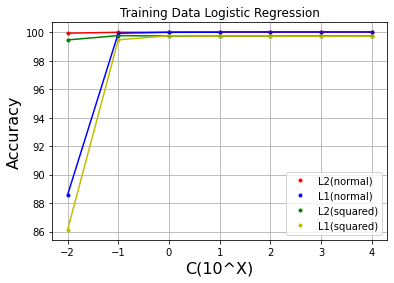

In [129]:
for i in range(7):  
    x1,y1 = i-2,accur1[2+(2*i)]
    x2,y2 = i-2,accur1[16+(2*i)]
    x3,y3 = i-2,accur2[2+(2*i)]
    x4,y4 = i-2,accur2[16+(2*i)]
    plt.plot(x1,y1,'r.')
    plt.plot(x2,y2,'b.')
    plt.plot(x3,y3,'g.')
    plt.plot(x4,y4,'y.')

for i in range(6):  
    x = np.linspace(i-2,i-1,100)
    slope1 = (accur1[2+(2*(i+1))] - accur1[2+(2*i)])/((i-1)-(i-2))
    slope2 = (accur1[16+(2*(i+1))] - accur1[16+(2*i)])/((i-1)-(i-2))
    slope3 = (accur2[2+(2*(i+1))] - accur2[2+(2*i)])/((i-1)-(i-2))
    slope4 = (accur2[16+(2*(i+1))] - accur2[16+(2*i)])/((i-1)-(i-2))
    y1 = slope1*(x-(i-2)) + accur1[2+(2*i)]
    y2 = slope2*(x-(i-2)) + accur1[16+(2*i)]
    y3 = slope3*(x-(i-2)) + accur2[2+(2*i)]
    y4 = slope4*(x-(i-2)) + accur2[16+(2*i)]
    plt.plot(x, y1, '-r', label='wx')
    plt.plot(x, y2, '-b', label='wx')
    plt.plot(x, y3, '-g', label='wx')
    plt.plot(x, y4, '-y', label='wx')

plt.xlabel("C(10^X)", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
# plt.ylim(-1,3)
# plt.xlim(-1,3)
plt.title("Training Data Logistic Regression")
plt.grid()
plt.legend(['L2(normal)','L1(normal)','L2(squared)','L1(squared)'],loc='lower right')

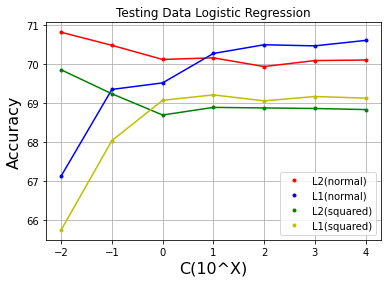

In [130]:
for i in range(7):  
    x1,y1 = i-2,accur1[3+(2*i)]
    x2,y2 = i-2,accur1[17+(2*i)]
    x3,y3 = i-2,accur2[3+(2*i)]
    x4,y4 = i-2,accur2[17+(2*i)]
    plt.plot(x1,y1,'r.')
    plt.plot(x2,y2,'b.')
    plt.plot(x3,y3,'g.')
    plt.plot(x4,y4,'y.')

for i in range(6):  
    x = np.linspace(i-2,i-1,100)
    slope1 = (accur1[3+(2*(i+1))] - accur1[3+(2*i)])
    slope2 = (accur1[17+(2*(i+1))] - accur1[17+(2*i)])
    slope3 = (accur2[3+(2*(i+1))] - accur2[3+(2*i)])
    slope4 = (accur2[17+(2*(i+1))] - accur2[17+(2*i)])
    y1 = slope1*(x-(i-2)) + accur1[3+(2*i)]
    y2 = slope2*(x-(i-2)) + accur1[17+(2*i)]
    y3 = slope3*(x-(i-2)) + accur2[3+(2*i)]
    y4 = slope4*(x-(i-2)) + accur2[17+(2*i)]
    plt.plot(x, y1, '-r', label='wx')
    plt.plot(x, y2, '-b', label='wx')
    plt.plot(x, y3, '-g', label='wx')
    plt.plot(x, y4, '-y', label='wx')

plt.xlabel("C(10^X)", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Testing Data Logistic Regression")
# plt.ylim(-1,3)
# plt.xlim(-1,3)
plt.grid()
plt.legend(['L2(normal)','L1(normal)','L2(squared)','L1(squared)'],loc='lower right')

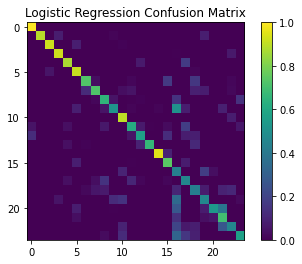

In [131]:
from sklearn.metrics import confusion_matrix

best_Log_reg = model1[1]
yhat = best_Log_reg.predict(X_test)
Con = confusion_matrix(Y_test,yhat)
Consum = np.sum(Con,1)
Con = Con / Consum[None,:]

plt.imshow(Con, interpolation='none')

plt.title("Logistic Regression Confusion Matrix")
plt.colorbar()




42


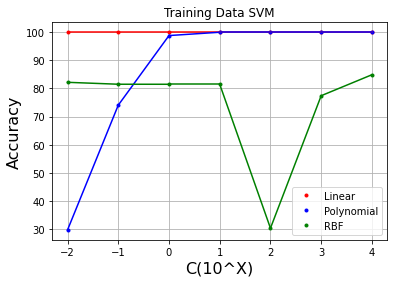

In [135]:
print(len(arr1))

for i in range(7):  
    x1,y1 = i-2,arr1[(2*i)]
    x2,y2 = i-2,arr1[14+(2*i)]
    x3,y3 = i-2,arr1[21+(2*i)]

    plt.plot(x1,y1,'r.')
    plt.plot(x2,y2,'b.')
    plt.plot(x3,y3,'g.')


for i in range(6):  
    x = np.linspace(i-2,i-1,100)
    slope1 = (arr1[(2*(i+1))] - arr1[(2*i)])
    slope2 = (arr1[14+(2*(i+1))] - arr1[14+(2*i)])
    slope3 = (arr1[21+(2*(i+1))] - arr1[21+(2*i)])
    
    y1 = slope1*(x-(i-2)) + arr1[(2*i)]
    y2 = slope2*(x-(i-2)) + arr1[14+(2*i)]
    y3 = slope3*(x-(i-2)) + arr1[21+(2*i)]
  
    plt.plot(x, y1, '-r', label='wx')
    plt.plot(x, y2, '-b', label='wx')
    plt.plot(x, y3, '-g', label='wx')


plt.xlabel("C(10^X)", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Training Data SVM")
# plt.ylim(-1,3)
# plt.xlim(-1,3)
plt.grid()
plt.legend(['Linear','Polynomial','RBF'],loc='lower right')

42


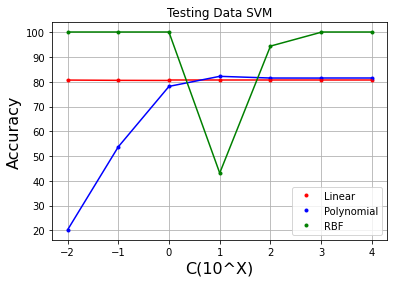

In [134]:
print(len(arr1))

for i in range(7):  
    x1,y1 = i-2,arr1[1+(2*i)]
    x2,y2 = i-2,arr1[15+(2*i)]
    x3,y3 = i-2,arr1[22+(2*i)]

    plt.plot(x1,y1,'r.')
    plt.plot(x2,y2,'b.')
    plt.plot(x3,y3,'g.')


for i in range(6):  
    x = np.linspace(i-2,i-1,100)
    slope1 = (arr1[1+(2*(i+1))] - arr1[1+(2*i)])
    slope2 = (arr1[15+(2*(i+1))] - arr1[15+(2*i)])
    slope3 = (arr1[22+(2*(i+1))] - arr1[22+(2*i)])
    
    y1 = slope1*(x-(i-2)) + arr1[1+(2*i)]
    y2 = slope2*(x-(i-2)) + arr1[15+(2*i)]
    y3 = slope3*(x-(i-2)) + arr1[22+(2*i)]
  
    plt.plot(x, y1, '-r', label='wx')
    plt.plot(x, y2, '-b', label='wx')
    plt.plot(x, y3, '-g', label='wx')


plt.xlabel("C(10^X)", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Testing Data SVM")
# plt.ylim(-1,3)
# plt.xlim(-1,3)
plt.grid()
plt.legend(['Linear','Polynomial','RBF'],loc='lower right')

[LibSVM]8


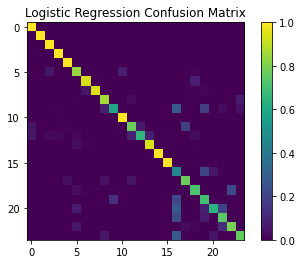

In [140]:
svc = svm.SVC(C=10,probability=False,  kernel="rbf",verbose=10)
svc.fit(X_train,Y_train)

print(len(svm_models))
from sklearn.metrics import confusion_matrix

yhat =svc.predict(X_test)
Con = confusion_matrix(Y_test,yhat)
Consum = np.sum(Con,1)
Con = Con / Consum[None,:]

plt.imshow(Con, interpolation='none')

plt.title("Logistic Regression Confusion Matrix")
plt.colorbar()


